## Title: Leveraging Quadratic Polynomials in Python for Advanced Data Analysis

### Revision 1 - With Comparison

### The explanation of the major differences between the first revision and the previously published version.

This updated version of the article includes several significant enhancements based on the reviewer's feedback.

**Introduction:** This paper highlights quadratic polynomials' unique advantages in capturing curvature and non-linear relationships. It also includes a brief comparison with other models, such as linear and cubic polynomials, emphasizing specific scenarios where quadratic polynomials are most effective.

**Data Preprocessing Steps:** A new subsection has been added detailing the preprocessing steps undertaken before fitting the quadratic model. This includes techniques for handling missing data, detecting and treating outliers, and applying data normalization or scaling. This addition aims to provide a clearer understanding of the steps taken to prepare the data for analysis.

**Discussion of R-squared Limitations:** The methods section now contains a paragraph discussing the limitations of using R-squared as the sole measure of model fit. It suggests additional metrics such as Adjusted R-squared, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to offer a more comprehensive evaluation of model performance.

**Results:** A new section has been included comparing the performance of quadratic polynomials with linear and cubic models using the same datasets. The comparison uses metrics like R-squared, Adjusted R-squared, and MSE to evaluate the fit and predictive accuracy, providing a broader perspective on the effectiveness of quadratic models.

**Discussion:** The discussion now delves deeper into the potential challenges and limitations of quadratic polynomials, such as overfitting and sensitivity to data variability. It addresses scenarios where quadratic polynomials might overfit, particularly with small or noisy datasets, and suggests methods for mitigating these issues, including regularization techniques and cross-validation methods. This addition aims to provide a more balanced view of the use of quadratic polynomials in data analysis.


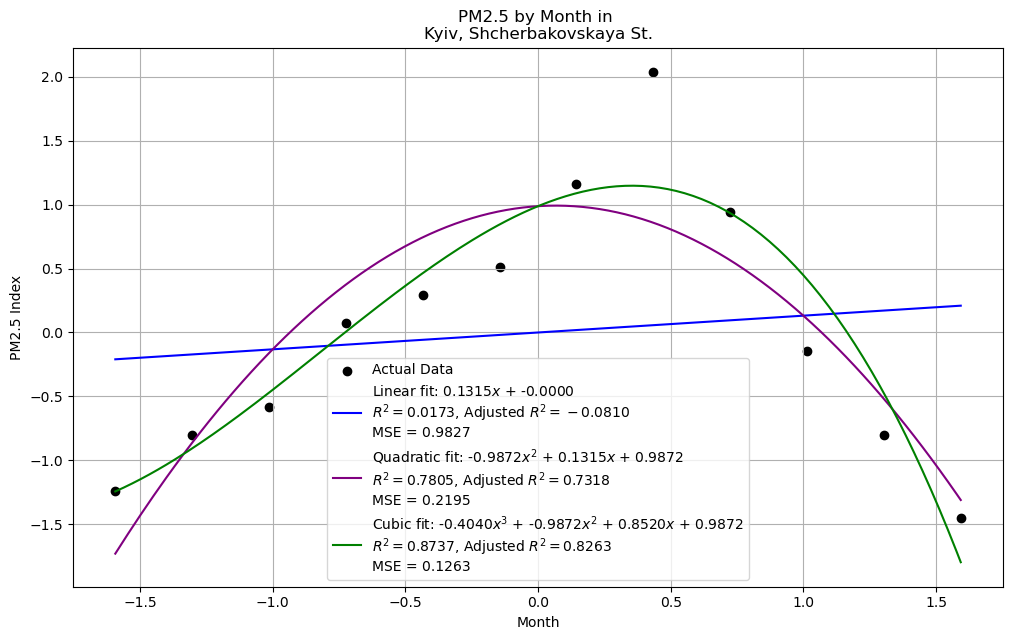

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import Polynomial
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

def handle_missing_data(data, method):
    if method == 'remove':
        data.dropna(inplace=True)
    elif method == 'mean':
        data.fillna(data.mean(), inplace=True)
    elif method == 'median':
        data.fillna(data.median(), inplace=True)
    elif method == 'ffill':
        data.fillna(method='ffill', inplace=True)
    elif method == 'bfill':
        data.fillna(method='bfill', inplace=True)
    else:
        raise ValueError("Method should be 'remove', 'mean', 'median', 'ffill', or 'bfill'")
    return data

def calculate_metrics(y_true, y_pred, degree):
    residuals = y_true - y_pred
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r_squared = 1 - (ss_res / ss_tot)
    adjusted_r_squared = 1 - (1 - r_squared) * (len(y_true) - 1) / (len(y_true) - degree - 1)
    mse = mean_squared_error(y_true, y_pred)
    return r_squared, adjusted_r_squared, mse

# User inputs for the descriptive elements of the plot
description = input("Enter the location description (e.g., Kyiv, Shcherbakovskaya St.): ")
pollution_name = input("Enter the pollution name (e.g., PM2.5): ")
y_label = input("Enter the y-axis label (e.g., PM2.5 Index): ")
missing_data_method = input("Choose how to handle missing data ('remove', 'mean', 'median', 'ffill', 'bfill'): ")

# Read data from a CSV file
data = pd.read_csv('https://raw.githubusercontent.com/rsipakov/QuadraticPolynomialsPyDA/main/notebooks/pm_data.csv')

# Handle missing data based on user choice
data = handle_missing_data(data, missing_data_method)

# Outlier Detection and Treatment using Z-Score method
z_scores = np.abs((data - data.mean()) / data.std())
data = data[(z_scores < 3).all(axis=1)]

# Extracting months and values
months = data['Month'].to_numpy()
values = data['Values'].to_numpy()

# Data Normalization using StandardScaler
scaler = StandardScaler()
months_scaled = scaler.fit_transform(months.reshape(-1, 1)).flatten()
values_scaled = scaler.fit_transform(values.reshape(-1, 1)).flatten()

# Fit the linear polynomial
linear_model = Polynomial.fit(months_scaled, values_scaled, 1)
linear_coefs = linear_model.convert().coef
linear_pred = linear_model(months_scaled)
linear_metrics = calculate_metrics(values_scaled, linear_pred, 1)

# Fit the quadratic polynomial
quadratic_model = Polynomial.fit(months_scaled, values_scaled, 2)
quadratic_coefs = quadratic_model.convert().coef
quadratic_pred = quadratic_model(months_scaled)
quadratic_metrics = calculate_metrics(values_scaled, quadratic_pred, 2)

# Fit the cubic polynomial
cubic_model = Polynomial.fit(months_scaled, values_scaled, 3)
cubic_coefs = cubic_model.convert().coef
cubic_pred = cubic_model(months_scaled)
cubic_metrics = calculate_metrics(values_scaled, cubic_pred, 3)

# Generate a smooth curve by evaluating the polynomials at many points
x = np.linspace(months_scaled.min(), months_scaled.max(), 200)
linear_y = linear_model(x)
quadratic_y = quadratic_model(x)
cubic_y = cubic_model(x)

# Create the plot
plt.figure(figsize=(12, 7))

# Plot the data and the fitted curves
plt.scatter(months_scaled, values_scaled, color='black', label='Actual Data')
plt.plot(x, linear_y, color='blue', label=f'Linear fit: {linear_coefs[1]:.4f}$x$ + {linear_coefs[0]:.4f}\n'
                                         f'$R^2 = {linear_metrics[0]:.4f}$, Adjusted $R^2 = {linear_metrics[1]:.4f}$\n'
                                         f'MSE = {linear_metrics[2]:.4f}')
plt.plot(x, quadratic_y, color='purple', label=f'Quadratic fit: {quadratic_coefs[2]:.4f}$x^2$ + {quadratic_coefs[1]:.4f}$x$ + {quadratic_coefs[0]:.4f}\n'
                                           f'$R^2 = {quadratic_metrics[0]:.4f}$, Adjusted $R^2 = {quadratic_metrics[1]:.4f}$\n'
                                           f'MSE = {quadratic_metrics[2]:.4f}')
plt.plot(x, cubic_y, color='green', label=f'Cubic fit: {cubic_coefs[3]:.4f}$x^3$ + {cubic_coefs[2]:.4f}$x^2$ + {cubic_coefs[1]:.4f}$x$ + {cubic_coefs[0]:.4f}\n'
                                         f'$R^2 = {cubic_metrics[0]:.4f}$, Adjusted $R^2 = {cubic_metrics[1]:.4f}$\n'
                                         f'MSE = {cubic_metrics[2]:.4f}')

# Title and labels using user inputs
plt.title(f'{pollution_name} by Month in \n{description}')
plt.xlabel('Month')
plt.ylabel(y_label)

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
